<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_2/c_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

## [Video de apoyo a la lectura de esta clase](https://www.youtube.com/watch?v=4JDqj1NT4Qk)

# Modelo de regresión para predicción de precio de vivienda

## Objetivo

* Construir un modelo de regresión para la predicción de precio de vivienda siguiendo la metodología de Aurelien Geron.

## Metodología de modelamiento para Machine Learning de Geron

1. Plantear, de manera justificada, la pregunta.
   * ¿Regresión o clasificación?
   * ¿Tipo de regresión y tipo de clasificación?

2. Exploración inicial.
   * Indicar la fuente de dónde se toman los datos.
   * Hacer la variable a predecir o variable objetivo.
   * Decir cuáles son los atributos predictores (descripción breve de cada uno)
   * Practicar una primera exploración tabular y gráfica de los datos.

3. Preparar los datos para los algoritmos de aprendizaje.  

   * Hacer separación inicial de datos para entrenar y para testear.
   * Explorar correlaciones lineales con la variable objetivo.
   * Eliminar de ser necesario atributos que no sean de mucha utilidad.
   * llenar datos faltantes.
   * Escalar los datos.
   * Automatizamos el proceso de preprocesamiento de los datos utilizando las clases Pipeline y ColumnTransformer de sklearn. 

4. Entrenamiento y selección de modelo.
   * Instanciar varios modelos y entrenarlos sobre datos de entrenamiento preparados.
   * Medir el desempeño de varios modelos (comparativa, con la técnica de la validación cruzada).

5. Afinar el modelo.
   * Crear cuadrícula (de búsqueda) de hiperparámetros.
   * Seleccionar la combinación de hiperparámetros que consigue el mejor puntaje. (El mejor modelo).

6. Presentar la solución.
   * Mostrar el desempeño sobre los datos para testear.
   * (Opcional) Gráfico intuitivo para representar el modelo.

[Video de apoyo sobre presentación de la metodología para modelo de machine Learning](https://www.youtube.com/watch?v=blRXFU2KooI)

# Implementación del plan 

1. Establecer bien la pregunta.
   * ¿Regresión o clasificación? y luego
   * ¿Tipo de regresión o tipo de clasificación?

Este es un problema de regresión porque lo que se trata es de predecir un valor o la función predictora de valor continuo o de valores en un intervalo de números reales. 

Tenemos un dataset con la siguiente configuración: $[X|y]$.  

$X = [x_{ij}] \in \mathbb{R}_{n,d}$.  
$X^{j}$: $j$ ésimo atributo.   
$X_{i}$: $i$ ésima fila o instancia ($i$ -ésimo distrito)  
$x_{ij}$: $ij$ ésima entrada de la matriz $X$.   
$y = [y_{i}] \in \mathbb{R}^{n}$: el vector de los valores promedios de vivienda.  
$y_{i}$ el valor promedio de vivienda en el $i$ ésimo distrito

El tipo de regresión es lineal porque 

$$h_{w}(X_{i}) = y_{i} = w^{T}X_{i} = w \cdot X_{i} = w_{0} + w_{1}x_{i1} + \cdots + w_{d}x_{id} $$ 
$$ = \begin{pmatrix} w_{0} \\ w_{1} \\ \vdots \\ w_{d} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ x_{i1} \\ \cdots \\ x_{id} \end{pmatrix} $$

donde $d$ es el número de atributos. 



# 2. Exploración inicial.

##  Indicar la fuente de dónde se toman los datos.

Su primera tarea es utilizar los datos del censo de California para construir un modelo de precios de viviendas en el estado.

Estos datos incluyen métricas como la población, el ingreso medio y el precio medio de la vivienda para cada grupo de bloques en California.

Los grupos de bloques son la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques suele tener una población de 600 a 3000 personas).

Los llamaremos “distritos” para abreviar.

Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las demás métricas.

# Hacer explícita la función objetivo.

$$ h_{w}:\mathbb{R}^{9} \to \mathbb{R} $$

$$ h(X_{n \times d}) = y $$

donde $X$ es una matriz alta (número de filas mucho mayor al número de columnas). 

$y$ es un vector de $\mathbb{R}^{n}$ cuyas entradas son los precios promedio de vivienda por distrito. 

$$ h(X_{i}) = y_{i} \in \mathbb{R}$$

## Decir cuáles son los atributos (descripción breve de cada uno)

Son nueve atributos o variables predictoras entre las que están:

* longitud
* latitud
* habitaciones
* dormitorios
* ingresos promedio
* proximidad al oceano
* antiguedad promedio de las viviendas en el distrito.
* Número de hogares: Número total de hogares por distrito. 
* población: población total por distrito


## [Video de apoyo]()

## Practicar una primera exploración gráfica de los datos.

## Importar las librerías que sirven a la obtención y visualización de datos

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 


## Obtención de los datos

In [2]:
v = pd.read_csv('vivienda.csv')  

In [3]:
v.head()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [4]:
v.tail()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,INLAND,89400.0


In [5]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   precio        20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Interpretaciones:**
* Será necesario procesar datos faltantes solo la variable dormitorios. 

Hay `20_640` instancias en el conjunto de datos, lo que significa que es bastante pequeño para los estándares de Machine Learning, pero es perfecto para comenzar. 

* Note que el atributo `total_bedrooms` solo tiene `20_433` valores no nulos,   

* lo que significa que 207 distritos no tienen este atributo. Tendremos que ocuparnos de esto más tarde.

Todos los atributos son numéricos, excepto el campo `ocean_proximity`. Su tipo es `objet`, por lo que podría contener cualquier tipo de objeto de Python. 

Pero dado que cargó estos datos desde un archivo CSV, sabe que debe ser un atributo de texto.

Cuando miró las cinco filas superiores, probablemente notó que los valores en la columna `ocean_proximity` eran repetitivos, lo que significa que probablemente sea un atributo categórico. 

Puede averiguar qué categorías existen y cuántos distritos pertenecen a cada categoría usando el método `value_counts()`:

En términos más generales, puede agregar un hiperparámetro para controlar cualquier paso de preparación de datos del que no esté $100 \%$ seguro.

In [6]:
v.proximidad.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidad, dtype: int64

# Visualización gráfica de los datos

## Visualización con diagrama de barras para variables categóricas nominales

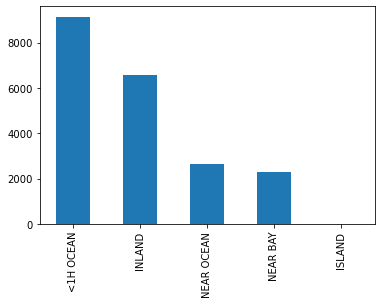

In [7]:
v.proximidad.value_counts().plot(kind = 'bar')
plt.savefig('diagrama_barras.jpg')
plt.show()

**Interpretación del gráfico:**  

* La clase `<1H OCEAN` es la que se presenta mayoritariamente, de hecho se presenta en más de 8000 distritos.  

* 

In [8]:
v.describe() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,precio
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Interpretaciones o inferencias que se derivan de la sintesis de los datos obtenida de la utilización del método `.describe()`**

* Como los rangos en los que se mueven los atributos predictores son tal diversos, entonces esto nos indica la necesidad de escalar los datos. 

## [Video de apoyo sobre visualización tabular](https://www.youtube.com/watch?v=pODyJ8oMACU)

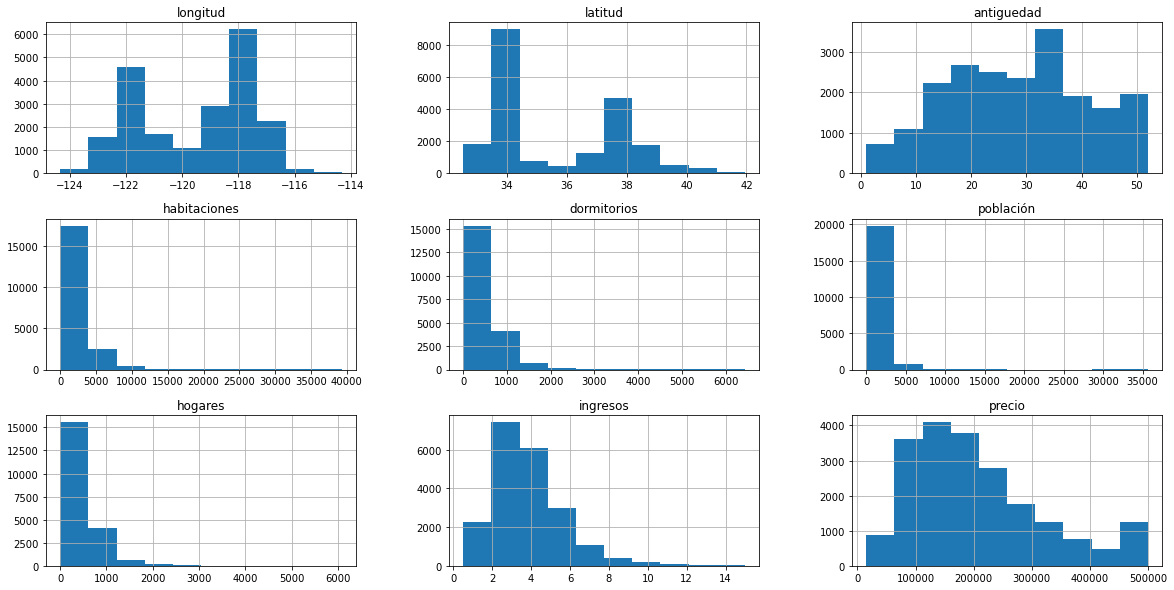

In [9]:
import matplotlib.pyplot as plt

v.hist(figsize = (20,10))

plt.show() 

**Interpretaciones e inferencias de la matriz de histogramas**  

* Los atributos se mueven en rangos muy diferentes y de tamaños muy variados.  
* 

## Visualización de datos geográficos 


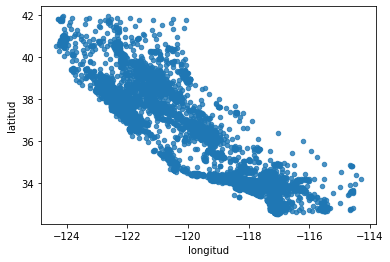

In [10]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.8)

plt.show() 

Esto se parece a California, pero aparte de eso, es difícil ver un patrón en particular. 

Establecer la opción `alpha` en $0.1$ hace que sea mucho más fácil visualizar los lugares donde hay una **alta densidad de puntos de datos**:

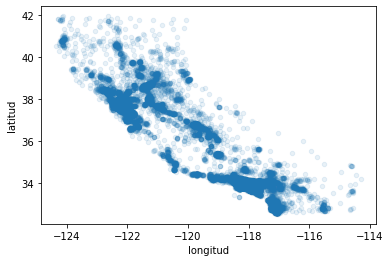

In [11]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1) 

plt.show() 

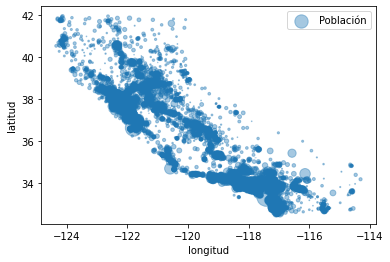

In [12]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.4, \
      s = v.población/100, label = 'Población')  

# s de size o tamaño del punto. 
plt.savefig('california_3D.jpg')

plt.show() 

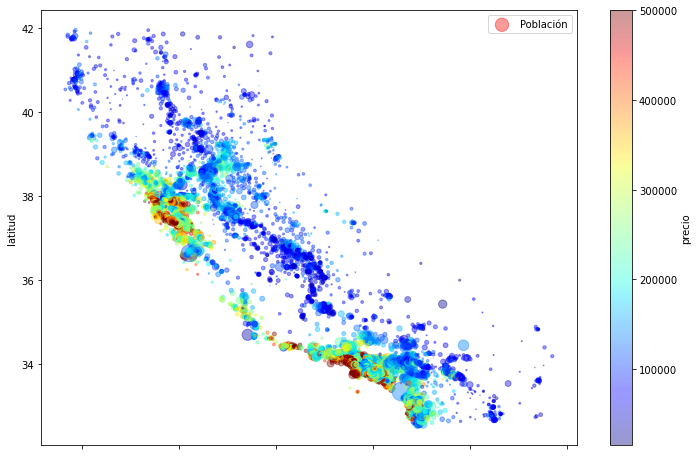

In [13]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.4, \
      s = v.población/100, label = 'Población', \
      c = 'precio', cmap = plt.get_cmap('jet'), colorbar = True, figsize = (12, 8))  

# s de size o tamaño del punto. 
plt.savefig('california_4D.jpg')

plt.show() 

In [16]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

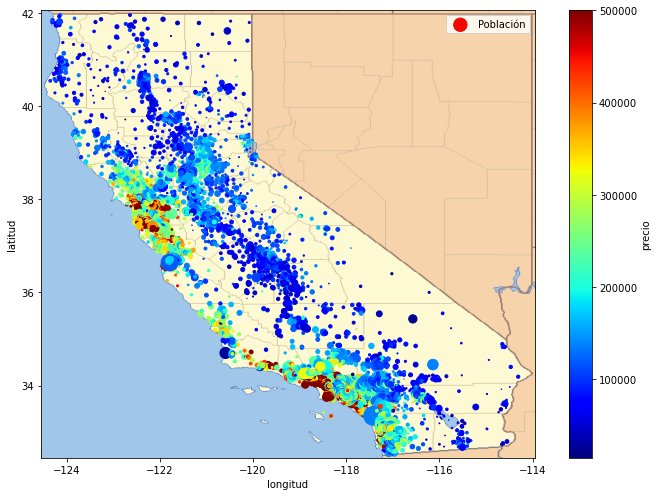

In [19]:
# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)


v.plot(kind="scatter", x="longitud", y="latitud",
             s=v["población"] / 100, label="Población",
             c="precio", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

**Interpretación e inferencias del gráfico con el mapa**  

* 

# 3. Preparar los datos para los algoritmos de aprendizaje.

## Hacer separación inicial de datos para entrenar y para testear.

In [ ]:
import numpy as np 
np.random.seed(42) 
# establecer una semilla aleatoria para hacer 
# reproducible la separación o muestreo aleatorio

def dividir_entrenamiento_testeo(datos, porcentaje_testeo):
    indices_reordenados = np.random.permutation(len(datos))
    tamaño_conjunto_testeo = int(len(datos)*porcentaje_testeo)
    indices_testeo = indices_reordenados[:tamaño_conjunto_testeo]
    indices_entrenamiento = indices_reordenados[tamaño_conjunto_testeo:]
    return datos.iloc[indices_entrenamiento], datos.iloc[indices_testeo]

In [ ]:
v_train, v_test = dividir_entrenamiento_testeo(v, 0.2)

In [ ]:
len(v_train), len(v_test) 

In [ ]:
len(v_train)+ len(v_test) 

In [ ]:
len(v_train)/len(v_test) 


# Separación del dataset en entrenamiento y testeo usando sklearn

In [ ]:
from sklearn.model_selection import train_test_split

v_train, v_test = train_test_split(v, test_size = 0.2, random_state = 42)

De ahora en adelante se seguirá es procesando a los datos de entrenamiento

## Limpiar datos y llenar datos faltantes.

In [ ]:
mediana  = v.dormitorios.median() 

In [ ]:
mediana 

In [ ]:
v.dormitorios.fillna(mediana)

In [ ]:
len(pd.DataFrame(v.dormitorios.fillna(mediana)))

# Imputación de datos faltantes

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputado = SimpleImputer(strategy = 'median') 

In [ ]:
v_num = v.drop(['proximidad'], axis = 1)

In [ ]:
imputado.fit(v_num)

In [ ]:
X = imputado.fit_transform(v_num) 

In [ ]:
v_num_imputado = pd.DataFrame(X,\
                     columns = v_num.columns, \
                     index = v_num.index) 

In [ ]:
v_num_imputado.info() 

# Explorar correlaciones lineales con la variable objetivo.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/759px-Correlation_examples2.svg.png'>

In [ ]:
v.corr() 

In [ ]:
v.corr().precio.sort_values(ascending = False) 

In [ ]:
from pandas.plotting import scatter_matrix 

# Eliminar de ser necesario atributos que no sean de mucha utilidad. Ingeniería de atributos.

# Experimentación con combinación de atributos 

Una última cosa que quizás desee hacer antes de preparar los datos para los algoritmos de Machine Learning es probar varias combinaciones de atributos.

Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no sabe cuántos hogares hay. 

Lo que realmente desea es el número de habitaciones por hogar. 

Del mismo modo, el número total de dormitorios por sí solo no es muy útil: probablemente quieras compararlo con el número de habitaciones.

Y la población por hogar también parece una combinación de atributos interesante para observar.

Vamos a crear estos nuevos atributos:

In [ ]:
v.head(1)

In [ ]:
v["habitaciones_por_hogar"] = v["habitaciones"]/v["hogares"]

In [ ]:
v["población_por_hogar"] = v["población"]/v["hogares"] 

In [ ]:
v['dormitorios_por_habitacion'] = v.dormitorios/v.habitaciones

In [ ]:
corr_matrix = v.corr()
corr_matrix['precio'].sort_values(ascending=False)

# Manipulación de datos categóricos

In [ ]:
v_cat = v[['proximidad']] 
# Recuerde que la clase OrdinalEncoder exige que el atributo categórico se entregue 
#en la forma de arreglo 2D

In [ ]:
v_cat.value_counts()

In [ ]:
from sklearn.preprocessing  import OrdinalEncoder 

In [ ]:
ordinal_encoder = OrdinalEncoder()

In [ ]:
v_cat_codificado = ordinal_encoder.fit_transform(v_cat) 

In [ ]:
v_cat_codificado[:10] 

# Transformadores personalizados

Aunque Scikit-Learn proporciona muchos transformadores útiles, deberá escribir los suyos propios para tareas como operaciones de limpieza personalizadas o combinación de atributos específicos.

Querrá que su transformador funcione a la perfección con las funcionalidades de Scikit-Learn (como las canalizaciones), y dado que Scikit-Learn se basa en la tipificación pato (no en la herencia), todo lo que necesita hacer es crear una clase e implementar tres métodos:  

* `fit()` (retornando a sí mismo),
* `transform()`, y
* `fit_transform()`.

Puede obtener el último de forma gratuita simplemente agregando `TransformerMixin` como clase base.

Si agrega `BaseEstimator` como clase base (y evita `*args` y `**kargs` en su constructor), también obtendrá dos métodos adicionales (`get_params()` y `set_params()`) que ser útil para el ajuste automático de hiperparámetros.

Por ejemplo, aquí hay una pequeña clase de transformador que agrega los atributos combinados que discutimos anteriormente:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self               # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [ ]:
v_extra_attribs = attr_adder.transform(v_train.values)

In [ ]:
v_extra_attribs_df = pd.DataFrame(v_extra_attribs, \
                                  columns = list(v_train.columns) + ['habitaciones_por_hogar', 'población_por_hogar'],\
                                 index = v_train.index)

In [ ]:
v_extra_attribs_df

En este ejemplo, el transformador tiene un hiperparámetro, `add_bedrooms_per_room`, establecido en True de forma predeterminada (a menudo es útil proporcionar valores predeterminados sensibles).

Este hiperparámetro le permitirá averiguar fácilmente si agregar este atributo ayuda o no a los algoritmos de Machine Learning.

En términos más generales, puede agregar un hiperparámetro para controlar cualquier paso de preparación de datos del que no esté $100\%$ seguro.

Cuanto más automatice estos pasos de preparación de datos, más combinaciones podrá probar automáticamente, lo que hará que sea mucho más probable que encuentre una gran combinación (y le ahorrará mucho tiempo).

# Escalado de atributos

Una de las transformaciones más importantes que debe aplicar a sus datos es el escalado de atributos.

Con pocas excepciones, los algoritmos de Machine Learning no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes.

Este es el caso de los datos de vivienda: el número total de habitaciones oscila entre unas 6 y 39.320, mientras que los ingresos medios solo oscilan entre 0 y 15.

Tenga en cuenta que, por lo general, no es necesario escalar los **valores objetivo**.

Hay dos formas comunes de hacer que todos los atributos tengan la misma escala:  

* escalamiento mínimo-máximo y 
* estandarización.

El escalado mínimo-máximo (muchas personas llaman a esto normalización) es el más simple: los valores se desplazan y reescalan para que terminen variando de 0 a 1.

Hacemos esto restando el valor mínimo y dividiendo por el máximo menos el mínimo.

Scikit-Learn proporciona un transformador llamado `MinMaxScaler` para esto.

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Tiene un hiperparámetro `feature_range` que te permite cambiar el rango si, por alguna razón, no quieres 0–1.

La estandarización es diferente: primero resta el valor medio (por lo que los valores estandarizados siempre tienen una media cero) y luego divide por la desviación estándar para que la distribución resultante tenga varianza unitaria.

A diferencia del escalado mínimo-máximo, la estandarización no limita los valores a un rango específico, lo que puede ser un problema para algunos algoritmos (por ejemplo, las redes neuronales a menudo esperan un valor de entrada que va de 0 a 1). 

Sin embargo, la **estandarización** se ve mucho menos afectada por los valores atípicos.

Por ejemplo, suponga que un distrito tiene un ingreso medio igual a 100 (por error).

La escala min-max aplastaría todos los demás valores de 0 a 15 hasta 0 a 0,15, mientras que la estandarización no se vería muy afectada.

Scikit-Learn proporciona un transformador llamado `StandardScaler` para la estandarización.

## Advertencia

Al igual que con todas las transformaciones, es importante ajustar los escaladores solo a los datos de entrenamiento, no al conjunto de datos completo (incluido el conjunto de prueba).

Only then can you use them to transform the training set and the test set (and new data).

## Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. 

Afortunadamente, Scikit-Learn proporciona la clase "Pipeline" para ayudar con tales secuencias de transformaciones.

Aquí hay una pequeña tubería para los atributos numéricos:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
v_num_tr = num_pipeline.fit_transform(v_num)

El constructor `Pipeline` toma una lista de pares de nombre/estimador que definen una secuencia de pasos. 

All but the last estimator must be transformers (i.e., they must have a `fit_transform()` method). 

The names can be anything you like (as long as they are unique and don’t contain double underscores, __); they will
come in handy later for hyperparameter tuning.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the fit()
method.

The pipeline exposes the same methods as the final estimator. 

In this example, the last estimator is a `StandardScaler`, which is a transformer, so the pipeline has a `transform()` method that applies all the transforms to the data in sequence (and of course also a `fit_transform()` method, which is the one we
used).

So far, we have handled the categorical columns and the numerical columns separately. 

It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 

In version 0.20, Scikit-Learn introduced the `ColumnTransformer` for this purpose, and the good news is that it works great with pandas DataFrames. 

Let’s use it to apply all the transformations to the housing data:

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(v_train_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
v_prepared = full_pipeline.fit_transform(v_train)

First we import the `ColumnTransformer` class, next we get the list of numerical column names and the list of categorical column names, and then we construct a `ColumnTransformer`. 

The constructor requires a list of tuples, where each tuple contains a name, a transformer, and a list of names (or indices) of columns that the transformer should be applied to. 

In this example, we specify that the numerical columns should be transformed using the num_pipeline that we defined earlier, and the categorical columns should be transformed using a `OneHotEncoder`. 

Finally, we apply this `ColumnTransformer` to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

Note that the `OneHotEncoder` returns a sparse matrix, while the num_pipeline returns a dense matrix. 

When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). 

In this example, it returns a dense matrix. 

And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

## Sugerencia

Instead of using a transformer, you can specify the string "drop" if you want the columns to be dropped, or you can specify "passthrough" if you want the columns to be left untouched.

By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but
you can set the remainder hyperparameter to any transformer (or to "passthrough") if you
want these columns to be handled differently.

Si usa Scikit-Learn 0.19 o anterior, puede usar una biblioteca de terceros, como sklearn-pandas, o puede implementar su propio transformador personalizado para obtener la misma funcionalidad que `ColumnTransformer`.

Alternativamente, puede usar la clase `FeatureUnion`, que puede aplicar diferentes transformadores y concatenar sus salidas.

But you cannot specify different columns for each transformer; they all apply to the whole data. 

It is possible to work around this limitation using a custom transformer for column selection (see the Jupyter notebook for an example).

# Select and Train a Model

At last! You framed the problem, you got the data and explored it, you sampled a training set and a test set, and you wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. 

You are now ready to select and train a Machine Learning model

## Training and Evaluating on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. Let’s first train a Linear Regression model, like we did in the previous chapter:

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(v_train_prepared, v_labels_train)

Done! You now have a working Linear Regression model. 

Let’s try it out on a few instances from the training set:

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). 

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s `mean_squared_error()` function:

In [ ]:
>>> from sklearn.metrics import mean_squared_error
>>> housing_predictions = lin_reg.predict(housing_prepared)
>>> lin_mse = mean_squared_error(housing_labels, housing_predictions)
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse


This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. 

This is an example of a model underfitting the training data. 

When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 

As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. 

This model is not regularized, which rules out the last option. You could try to add more features
(e.g., the log of the population), but first let’s try a more complex model to see how it does.

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data (Decision Trees are presented in more detail in Chapter 6). 

The code should look familiar by now:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

Now that the model is trained, let’s evaluate it on the training set:


In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
>>> tree_mse = mean_squared_error(housing_labels, housing_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse


Wait, what!? No error at all? 

Could this model really be absolutely perfect? 

Of course, it is much more likely that the model has badly overfit the data. 

How can you be sure? 

As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.

# Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the `train_test_split()` function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. 

It’s a bit of work, but nothing too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. 

The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 

The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

## WARNING

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

Let’s look at the results:


In [ ]:
>>> def display_scores(scores):
... print("Scores:", scores)
... print("Mean:", scores.mean())
... print("Standard deviation:", scores.std())
...
>>> display_scores(tree_rmse_scores)


Now the Decision Tree doesn’t look as good as it did earlier. 

In fact, it seems to perform worse than the Linear Regression model! 

Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

The Decision Tree has a score of approximately 71,407, generally ±2,439. 

You would not have this information if you just used one validation set. 

But cross-validation comes at the cost of training the model several times, so it is not always possible.

Let’s compute the same scores for the Linear Regression model just to be sure:

In [ ]:
>>> lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
... scoring="neg_mean_squared_error", cv=10)
...
>>> lin_rmse_scores = np.sqrt(-lin_scores)
>>> display_scores(lin_rmse_scores)

That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Let’s try one last model now: the RandomForestRegressor. 

As we will see in Chapter 7, Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. 

Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. 

We will skip most of the code since it is essentially the same as for the other models:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
>>> forest_rmse

In [ ]:
>>> display_scores(forest_rmse_scores)

Wow, this is much better: Random Forests look very promising. 

However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. 

Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. 

Before you dive much deeper into Random Forests, however, you should try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. 

The goal is to shortlist a few (two to five)
promising models.

### Sugerencia

You should save every model you experiment with so that you can come back easily to any model you want. 

Asegúrese de guardar tanto los hiperparámetros como los parámetros entrenados, así como las puntuaciones de validación cruzada y quizás también las predicciones reales.

This will allow you to easily compare scores across model types, and compare the types of errors they make.

You can easily save Scikit-Learn models by using Python’s pickle module or by using the joblib library, which is more efficient at serializing large NumPy arrays (you can install this library using pip):

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")


# Ajuste su modelo

Let’s assume that you now have a shortlist of promising models. 

You now need to fine-tune them. Let’s look at a few ways you can do that.

## Referentes  

* La clase MinMaxScaler para normalizar datos: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 

* la documentación de la función plot asociada a los dataframe de pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html 

In [5]:
2**512


13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084096